## TM polarization
We should be able to see surface plasmons for a metal-air interface

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from eigenwell.src import grid,eigen_w
from eigenwell.src.constants import *

(80, 80)
(6400, 6400)


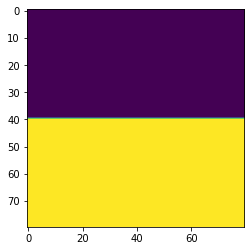

In [20]:
Nx = 80;
Ny = 80;
N = np.array([Nx, Ny]);

eps_r = np.ones(N);

a = np.array([1,1]);
dL = a/N;
radius = 0.25;
## put in a circle;
ci = int(Nx/2); cj= int(Ny/2);

eps_r = eps_r.astype('complex')
eps_r[0:ci,:] = -2+1e-2*1j;

print(eps_r.shape)

plt.imshow(np.real(eps_r))
wvlen_scan = np.linspace(1.01, 20, 100);
wvlen_scan = np.logspace(np.log10(0.8), np.log10(10), 600);


fd = grid.FiniteDifference(dL,N)

print(fd.Dxf.shape)



In [21]:
eigenTM = eigen_w.EigenOmega2D(eps_r, fd)

In [ ]:
eigenvals, eigenmodes = eigenTM.eigensolve(num_modes = 5)